In [1]:
from ann_visualizer.visualize import ann_viz
import netron
from keras.callbacks import TensorBoard
import visualkeras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.metrics import r2_score
from keras.optimizers import Adam
import matplotlib.animation as animation

print("LIB imported")

LIB imported


In [4]:
# Load the data from "training.csv" into a pandas DataFrame
data = pd.read_csv("Training_Zscore.csv")
# valid = pd.read_csv("12@50_zscore.csv")
# Apply the conditions and update the 'Classifier' column
data["Classifier"] = 2
data.loc[(data['Time'] < 150) & (data['Pressure'] > 0), 'Classifier'] = 1
data.loc[(data['Time'] > 150) & (data['Pressure'] > 0), 'Classifier'] = 3

# valid["Classifier"] = 2
# valid.loc[(valid['Time'] < 150) & (valid['Pressure'] > 0), 'Classifier'] = 1
# valid.loc[(valid['Time'] > 150) & (valid['Pressure'] > 0), 'Classifier'] = 3

# Split the data into input features (dataX) and target variable (dataY)
dataX = data[["Acceleration", "TWR", "AltitudeFromTerrain", "DownrangeDistance", "Inclination", "VesselDeltaV", "Apoapsis", "Pressure", "GForce","Classifier"]]
dataY = data["Velocity"]

# validX = valid[["Acceleration", "TWR", "AltitudeFromTerrain", "DownrangeDistance", "Inclination", "VesselDeltaV", "Apoapsis", "Pressure", "GForce","Classifier"]]
# validY = valid["Velocity"]

# Split the data into training and testing datasets using train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(dataX, dataY, test_size=0.3, random_state=104, shuffle=True)


# Only run if you want to train the existing saved model

In [5]:
model_section1 = load_model('model_section1.h5')

# Dont run this if you are training the pre exiting model, or if you are dumb run the above! don't run the below

In [5]:
# Define the neural network model for each section
model_section1 = Sequential()
model_section1.add(Dense(1000, input_dim=10, activation='relu'))
model_section1.add(Dense(1000, activation='linear'))
model_section1.add(Dense(1000, activation='linear'))
model_section1.add(Dense(1000, input_dim=10, activation='relu'))
model_section1.add(Dense(1, activation='linear'))
# model_section1.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.adam(learning_rate=0.01, momentum=0.9, nesterov=True))
# model_section1.compile(loss='mean_squared_error', optimizer=keras.optimizers.adam(learning_rate=0.003,nesterov=True))
model_section1.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0003))

In [7]:
# Train the models on the corresponding sections of the data
model_section1.fit(xTrain, yTrain, epochs=3000, batch_size=8085 )

1/1 [==============================] - 0s 183ms/step - loss: 0.0019
Epoch 1674/3000
1/1 [==============================] - 0s 198ms/step - loss: 0.0023
Epoch 1675/3000
1/1 [==============================] - 0s 187ms/step - loss: 0.0029
Epoch 1676/3000
1/1 [==============================] - 0s 188ms/step - loss: 0.0036
Epoch 1677/3000
1/1 [==============================] - 0s 190ms/step - loss: 0.0040
Epoch 1678/3000
1/1 [==============================] - 0s 185ms/step - loss: 0.0041
Epoch 1679/3000
1/1 [==============================] - 0s 183ms/step - loss: 0.0034
Epoch 1680/3000
1/1 [==============================] - 0s 180ms/step - loss: 0.0023
Epoch 1681/3000
1/1 [==============================] - 0s 179ms/step - loss: 0.0013
Epoch 1682/3000
1/1 [==============================] - 0s 175ms/step - loss: 0.0010
Epoch 1683/3000
1/1 [==============================] - 0s 180ms/step - loss: 0.0014
Epoch 1684/3000
1/1 [==============================] - 0s 180ms/step - loss: 0.0020
Epoch 16

Epoch 1/3000
1/1 [==============================] - 0s 174ms/step - loss: 5.6203e-04
Epoch 2/3000
1/1 [==============================] - 0s 167ms/step - loss: 4.4848e-04
Epoch 3/3000
1/1 [==============================] - 0s 166ms/step - loss: 3.2469e-04
Epoch 4/3000
1/1 [==============================] - 0s 167ms/step - loss: 2.5947e-04
Epoch 5/3000
1/1 [==============================] - 0s 180ms/step - loss: 2.5090e-04
Epoch 6/3000
1/1 [==============================] - 0s 191ms/step - loss: 2.3508e-04
Epoch 7/3000
1/1 [==============================] - 0s 194ms/step - loss: 1.8872e-04
Epoch 8/3000
1/1 [==============================] - 0s 176ms/step - loss: 1.6404e-04
Epoch 9/3000
1/1 [==============================] - 0s 180ms/step - loss: 2.0146e-04
Epoch 10/3000
1/1 [==============================] - 0s 176ms/step - loss: 2.5846e-04
Epoch 11/3000
1/1 [==============================] - 0s 176ms/step - loss: 2.8329e-04
Epoch 12/3000
1/1 [==============================] - 0s 179ms/s

In [6]:
# Evaluate the performance of the models on the testing data
section1_loss = model_section1.evaluate(xTest, yTest)

76/76 [==============================] - 0s 1ms/step - loss: 3.2370e-04


loss: 3.2370e-04

In [7]:
# Make predictions using the trained models
predict_section1 = model_section1.predict(xTest)

76/76 [==============================] - 0s 1ms/step


In [8]:
# Calculate the R2 score
r2 = r2_score(yTest, predict_section1)

# Print the R2 score as a percentage
print("R2 score (percentage accuracy):", r2 * 100)

R2 score (percentage accuracy): 99.96763113367604


Accuracy = 99.96763113367604

### Visualizing the models

In [9]:
ann_viz(model_section1, view=False, filename="model_1.gv")

ModuleNotFoundError: No module named 'graphviz'

goes to netron

In [10]:
netron.start("model_section1.h5")

Serving 'model_section1.h5' at http://localhost:8080


('localhost', 8080)

In [70]:
# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1,write_graph=True,write_images=True) # write_image = True
# Train the models on the corresponding sections of the data with the TensorBoard callback
model_section1.fit(xTrain, yTrain, epochs=1000, batch_size=8085, callbacks=[tensorboard_callback])

Epoch 1/1000
1/1 [==============================] - 0s 363ms/step - loss: 1728155.5000
Epoch 2/1000
1/1 [==============================] - 0s 421ms/step - loss: 1728028.8750
Epoch 3/1000
1/1 [==============================] - 0s 344ms/step - loss: 1727901.8750
Epoch 4/1000
1/1 [==============================] - 0s 366ms/step - loss: 1727774.5000
Epoch 5/1000
1/1 [==============================] - 0s 345ms/step - loss: 1727647.0000
Epoch 6/1000
1/1 [==============================] - 0s 340ms/step - loss: 1727519.1250
Epoch 7/1000
1/1 [==============================] - 0s 320ms/step - loss: 1727390.2500
Epoch 8/1000
1/1 [==============================] - 0s 320ms/step - loss: 1727261.2500
Epoch 9/1000
1/1 [==============================] - 0s 307ms/step - loss: 1727132.3750
Epoch 10/1000
1/1 [==============================] - 0s 321ms/step - loss: 1727002.8750
Epoch 11/1000
1/1 [==============================] - 0s 324ms/step - loss: 1726873.0000
Epoch 12/1000
1/1 [======================

KeyboardInterrupt: 

In [10]:
# Visualize the model
visualkeras.layered_view(model_section1, to_file='model.png').show()

## run below command in terminal
tensorboard --logdir="C:\Users\LENOVO\PycharmProjects\pythonProject\Velocity-Prediction-for-S2-33\logs"


In [11]:
section1_loss

0.00032369664404541254

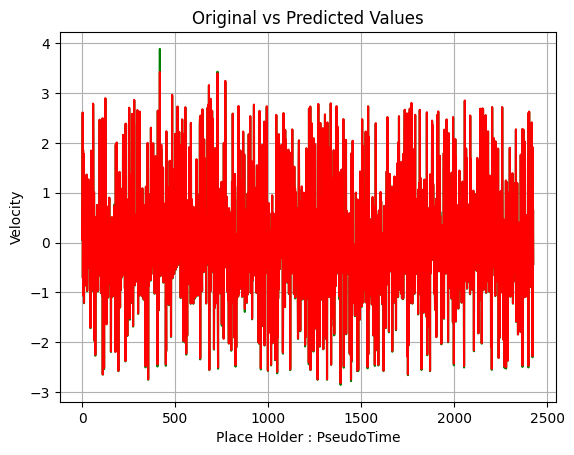

In [12]:
time = np.arange(0,2426)
# Plot the original vs predicted values
plt.plot(time, predict_section1, c ='g', label = "Predicted")
plt.plot(time, yTest,c ='r', label = "Original")
plt.title("Original vs Predicted Values")
plt.ylabel("Velocity")
plt.xlabel("Place Holder : PseudoTime")
# plt.legend()
plt.grid(True)
plt.show()
plt.show()


In [13]:
predict_section1

array([[ 0.05286656],
       [ 0.9124685 ],
       [ 2.6041627 ],
       ...,
       [-0.02555521],
       [ 0.65296656],
       [-0.4339957 ]], dtype=float32)

In [14]:
sortedarr = np.sort(predict_section1,axis=None)

In [15]:
sortedarr

array([-2.856367 , -2.7800539, -2.752829 , ...,  3.2215195,  3.428487 ,
        3.8848863], dtype=float32)

In [16]:
yTestsort = yTest.sort_values(ascending=True)
yTestsort

5378   -2.819979
976    -2.744344
5381   -2.744344
2241   -2.744344
4672   -2.744344
          ...   
5475    2.963844
5467    3.159604
5465    3.244137
5462    3.395406
5461    3.422101
Name: Velocity, Length: 2426, dtype: float64

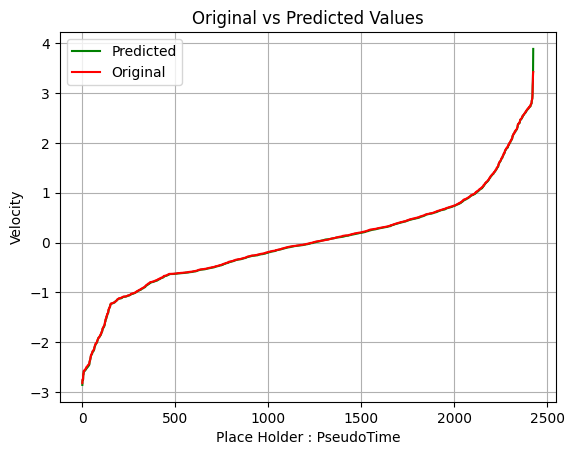

In [17]:
# Combine the predicted values into a Numpy array named "predict"
# predict = np.concatenate((predict_section1, predict_section2, predict_section3))

time = np.arange(0,2426)
#Plot the original vs predicted values
plt.plot(time, sortedarr, c ='g', label = "Predicted")
plt.plot(time, yTestsort,c ='r', label = "Original")
plt.title("Original vs Predicted Values")
plt.ylabel("Velocity")
plt.xlabel("Place Holder : PseudoTime")
plt.legend()
plt.grid(True)
plt.show()
plt.show()


# this is for saving the model

In [19]:
# model_section1.save('model_section1.h5')